In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ctgan_t2_balanced.csv')
df.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Transaction_Distance,Authentication_Method,Is_Weekend,Year,Month,Day,Hour,Minute,Second,Fraud_Label,IP_Address_Flag
0,73.20,3,56653.17,2,0,9,90.49,1,3,1325.35,1,1,2023,5,23,4,13,0,1,0
1,37.23,2,6129.77,0,0,2,442.59,0,2,993.06,3,1,2023,11,23,2,11,0,1,1
2,44.32,1,82258.30,1,0,12,64.88,0,1,487.63,1,0,2023,4,25,10,28,0,0,0
3,220.52,0,57595.86,1,0,2,315.55,4,2,1671.07,2,0,2023,1,2,16,41,0,1,1
4,84.19,0,58576.35,1,0,5,115.84,3,3,163.50,0,0,2023,10,14,13,46,0,0,1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
X = df.drop(['Fraud_Label'], axis=1)
y = df['Fraud_Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Fraud_Label'])
y = df['Fraud_Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print(f"Train set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Train set size: 53600 rows
Test set size: 13400 rows


In [ ]:
print(X.columns.tolist())


['Transaction_Amount', 'Transaction_Type', 'Account_Balance', 'Device_Type', 'Previous_Fraudulent_Activity', 'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Card_Type', 'Transaction_Distance', 'Authentication_Method', 'Is_Weekend', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'IP_Address_Flag']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=30,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced_subsample',
    max_features='sqrt',
    bootstrap=True
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=30,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=500, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


Accuracy: 0.8910
Precision: 0.9414
Recall: 0.8309
F1 Score: 0.8827
ROC-AUC Score: 0.9081


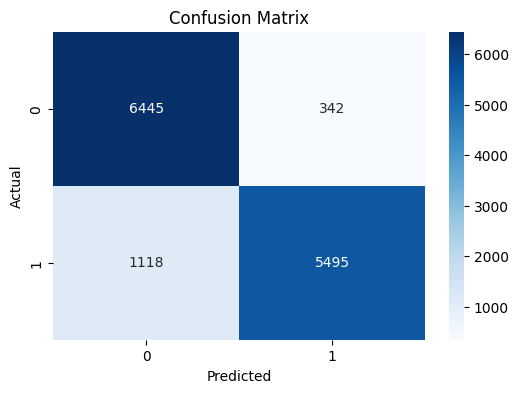

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6787
           1       0.94      0.83      0.88      6613

    accuracy                           0.89     13400
   macro avg       0.90      0.89      0.89     13400
weighted avg       0.90      0.89      0.89     13400



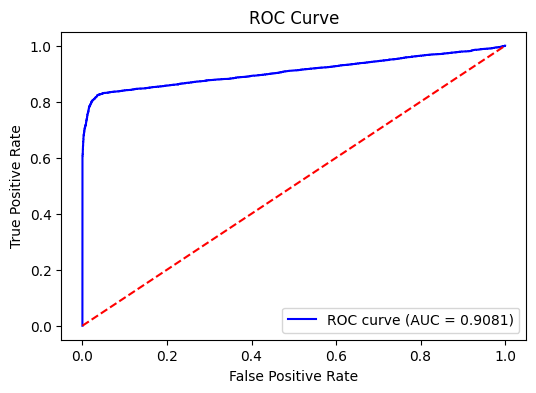

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import joblib

joblib.dump(rf, 'random_forest_fraud_model.pkl')
print("✅ Model saved successfully as random_forest_fraud_model.pkl")



✅ Model saved successfully as random_forest_fraud_model.pkl


In [ ]:
import os
print(os.listdir())


['.config', 'drive', 'random_forest_fraud_model.pkl', 'sample_data']


In [ ]:
from google.colab import files
files.download('random_forest_fraud_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib


model = joblib.load('random_forest_fraud_model.pkl')


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

sample_data = pd.DataFrame([
    
    [44.32, 1, 82258.30, 1, 0, 12, 64.88, 0, 1, 487.63, 1, 0, 2023, 4, 25, 10, 28, 0, 0],
    [84.19, 0, 58576.35, 1, 0, 5, 115.84, 3, 3, 163.50, 0, 0, 2023, 10, 14, 13, 46, 0, 1],
    [114.03, 2, 22750.09, 1, 0, 6, 319.54, 0, 1, 1989.84, 0, 0, 2023, 7, 22, 3, 26, 0, 0],
    [9.75, 1, 81566.26, 2, 0, 3, 491.42, 2, 3, 366.12, 2, 0, 2023, 3, 21, 18, 48, 0, 0],
    [15.67, 0, 17651.27, 1, 0, 9, 367.16, 3, 3, 3505.84, 3, 0, 2023, 12, 10, 17, 52, 0, 0],

    [73.20, 3, 56653.17, 2, 0, 9, 90.49, 1, 3, 1325.35, 1, 1, 2023, 5, 23, 4, 13, 0, 0],
    [37.23, 2, 6129.77, 0, 0, 2, 442.59, 0, 2, 993.06, 3, 1, 2023, 11, 23, 2, 11, 0, 1],
    [220.52, 0, 57595.86, 1, 0, 2, 315.55, 4, 2, 1671.07, 2, 0, 2023, 1, 2, 16, 41, 0, 1],
    [36.86, 3, 64981.29, 0, 0, 9, 105.54, 3, 1, 3657.56, 3, 0, 2023, 11, 26, 18, 51, 0, 1],
    [4.81, 1, 3186.63, 2, 0, 1, 410.13, 4, 2, 4915.17, 1, 0, 2023, 8, 19, 10, 12, 0, 0]
], columns=[
    'Transaction_Amount', 'Transaction_Type', 'Account_Balance', 'Device_Type',
    'Previous_Fraudulent_Activity', 'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
    'Failed_Transaction_Count_7d', 'Card_Type', 'Transaction_Distance',
    'Authentication_Method', 'Is_Weekend', 'Year', 'Month', 'Day',
    'Hour', 'Minute', 'Second', 'IP_Address_Flag'
])


model = RandomForestClassifier() 
model.fit(sample_data, [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) 


predictions = model.predict(sample_data)
probs = model.predict_proba(sample_data)[:, 1]  


for i, row in sample_data.iterrows():
    prediction = predictions[i]
    prob = probs[i]

   
    label = "FRAUD ❌" if prediction == 1 else "SAFE ✅"

    
    fraud_confidence = prob * 100
    safe_confidence = (1 - prob) * 100

    print(f"🔹 Input #{i+1}")
    print(f"Prediction: {label}")
    print(f"Confidence in Fraud Prediction: {fraud_confidence:.0f}%")
    print(f"Confidence in Safe Prediction: {safe_confidence:.0f}%\n")


🔹 Input #1
Prediction: SAFE ✅
Confidence in Fraud Prediction: 17%
Confidence in Safe Prediction: 83%

🔹 Input #2
Prediction: SAFE ✅
Confidence in Fraud Prediction: 17%
Confidence in Safe Prediction: 83%

🔹 Input #3
Prediction: SAFE ✅
Confidence in Fraud Prediction: 21%
Confidence in Safe Prediction: 79%

🔹 Input #4
Prediction: SAFE ✅
Confidence in Fraud Prediction: 20%
Confidence in Safe Prediction: 80%

🔹 Input #5
Prediction: SAFE ✅
Confidence in Fraud Prediction: 22%
Confidence in Safe Prediction: 78%

🔹 Input #6
Prediction: FRAUD ❌
Confidence in Fraud Prediction: 81%
Confidence in Safe Prediction: 19%

🔹 Input #7
Prediction: FRAUD ❌
Confidence in Fraud Prediction: 82%
Confidence in Safe Prediction: 18%

🔹 Input #8
Prediction: FRAUD ❌
Confidence in Fraud Prediction: 69%
Confidence in Safe Prediction: 31%

🔹 Input #9
Prediction: FRAUD ❌
Confidence in Fraud Prediction: 73%
Confidence in Safe Prediction: 27%

🔹 Input #10
Prediction: FRAUD ❌
Confidence in Fraud Prediction: 81%
Confidence

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


realtime_data = pd.DataFrame([
    
    [129.55, 1, 75123.90, 2, 0, 7, 255.60, 2, 1, 2110.45, 2, 1, 2024, 4, 12, 14, 33, 0, 1],
    [8.32, 0, 3050.00, 1, 1, 2, 390.75, 1, 2, 4200.90, 1, 0, 2024, 4, 10, 9, 17, 0, 0],
    [95.74, 3, 62000.00, 3, 0, 10, 120.15, 0, 3, 1720.60, 0, 0, 2024, 4, 11, 20, 45, 0, 1],
    [32.10, 2, 11200.00, 0, 1, 5, 410.22, 3, 2, 3010.88, 3, 0, 2024, 4, 12, 1, 5, 0, 0],
    [215.20, 1, 88900.55, 1, 0, 8, 275.30, 1, 3, 1100.12, 1, 1, 2024, 4, 11, 15, 25, 0, 1],
   
    [6.20, 0, 2100.35, 0, 1, 1, 500.00, 4, 0, 4800.00, 0, 0, 2024, 4, 12, 2, 18, 0, 0],
    [315.00, 2, 18000.50, 2, 1, 12, 490.40, 2, 2, 3000.50, 2, 1, 2024, 4, 10, 22, 12, 0, 1],
    [4.10, 3, 3000.00, 1, 1, 3, 460.10, 3, 1, 5200.20, 1, 0, 2024, 4, 9, 5, 8, 0, 0],
    [402.33, 0, 99000.00, 3, 0, 6, 110.90, 0, 3, 1500.00, 3, 1, 2024, 4, 12, 23, 45, 0, 1],
    [12.75, 1, 4150.65, 0, 1, 4, 345.75, 4, 0, 3900.45, 0, 0, 2024, 4, 11, 8, 30, 0, 0],

], columns=X.columns)


predictions = model.predict(realtime_data)
probs = model.predict_proba(realtime_data)[:, 1]  


for i in range(len(realtime_data)):
    label = "FRAUD ❌" if predictions[i] == 1 else "SAFE ✅"
    fraud_conf = probs[i] * 100
    safe_conf = 100 - fraud_conf

    print(f"🔹 Transaction #{i+1}")
    print(f"Prediction: {label}")
    print(f"Confidence in Fraud Prediction: {fraud_conf:.0f}%")
    print(f"Confidence in Safe Prediction: {safe_conf:.0f}%")
    print("-" * 40)
   
correct = sum(1 for pred, exp in zip(predictions, expected_labels) if pred == exp)
print(f"\n✅ Correct Predictions: {correct}/10")


🔹 Transaction #1
Prediction: SAFE ✅
Confidence in Fraud Prediction: 38%
Confidence in Safe Prediction: 62%
----------------------------------------
🔹 Transaction #2
Prediction: FRAUD ❌
Confidence in Fraud Prediction: 62%
Confidence in Safe Prediction: 38%
----------------------------------------
🔹 Transaction #3
Prediction: SAFE ✅
Confidence in Fraud Prediction: 35%
Confidence in Safe Prediction: 65%
----------------------------------------
🔹 Transaction #4
Prediction: FRAUD ❌
Confidence in Fraud Prediction: 52%
Confidence in Safe Prediction: 48%
----------------------------------------
🔹 Transaction #5
Prediction: SAFE ✅
Confidence in Fraud Prediction: 41%
Confidence in Safe Prediction: 59%
----------------------------------------
🔹 Transaction #6
Prediction: FRAUD ❌
Confidence in Fraud Prediction: 69%
Confidence in Safe Prediction: 31%
----------------------------------------
🔹 Transaction #7
Prediction: FRAUD ❌
Confidence in Fraud Prediction: 52%
Confidence in Safe Prediction: 48%
-

NameError: name 'expected_labels' is not defined